Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
marketing_campaign = pd.read_csv('/content/marketing_campaign(1).csv')
df = marketing_campaign.copy()

In [ ]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# **EDA**

In [ ]:
df.shape

(2221, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2221 non-null   int64  
 1   ID                   2221 non-null   int64  
 2   Year_Birth           2221 non-null   int64  
 3   Education            2221 non-null   object 
 4   Marital_Status       2221 non-null   object 
 5   Income               2198 non-null   float64
 6   Kidhome              2221 non-null   int64  
 7   Teenhome             2221 non-null   int64  
 8   Dt_Customer          2221 non-null   object 
 9   Recency              2221 non-null   int64  
 10  MntWines             2221 non-null   int64  
 11  MntFruits            2221 non-null   int64  
 12  MntMeatProducts      2221 non-null   int64  
 13  MntFishProducts      2221 non-null   int64  
 14  MntSweetProducts     2221 non-null   int64  
 15  MntGoldProds         2221 non-null   i

                We have only 3 features that has 'object' type

In [ ]:
df.nunique()

Unnamed: 0             2221
ID                     2221
Year_Birth               52
Education                 5
Marital_Status            8
Income                 1957
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                770
MntFruits               158
MntMeatProducts         551
MntFishProducts         181
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

NOTE

* In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them.

In [ ]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

* We can see that 'income' column has some missing values

<Axes: >

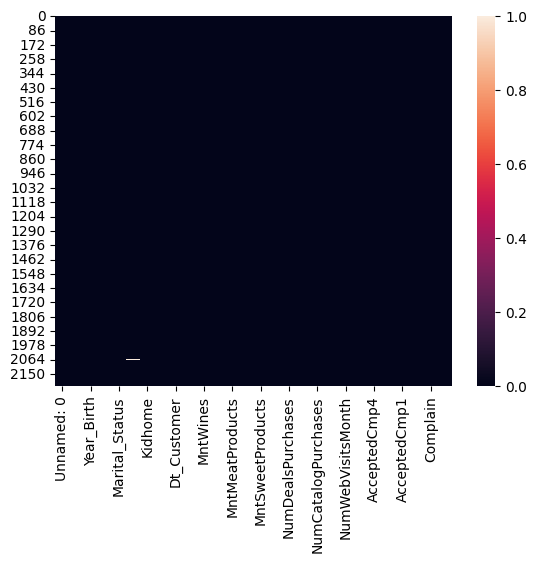

In [ ]:
sns.heatmap(df.isnull())

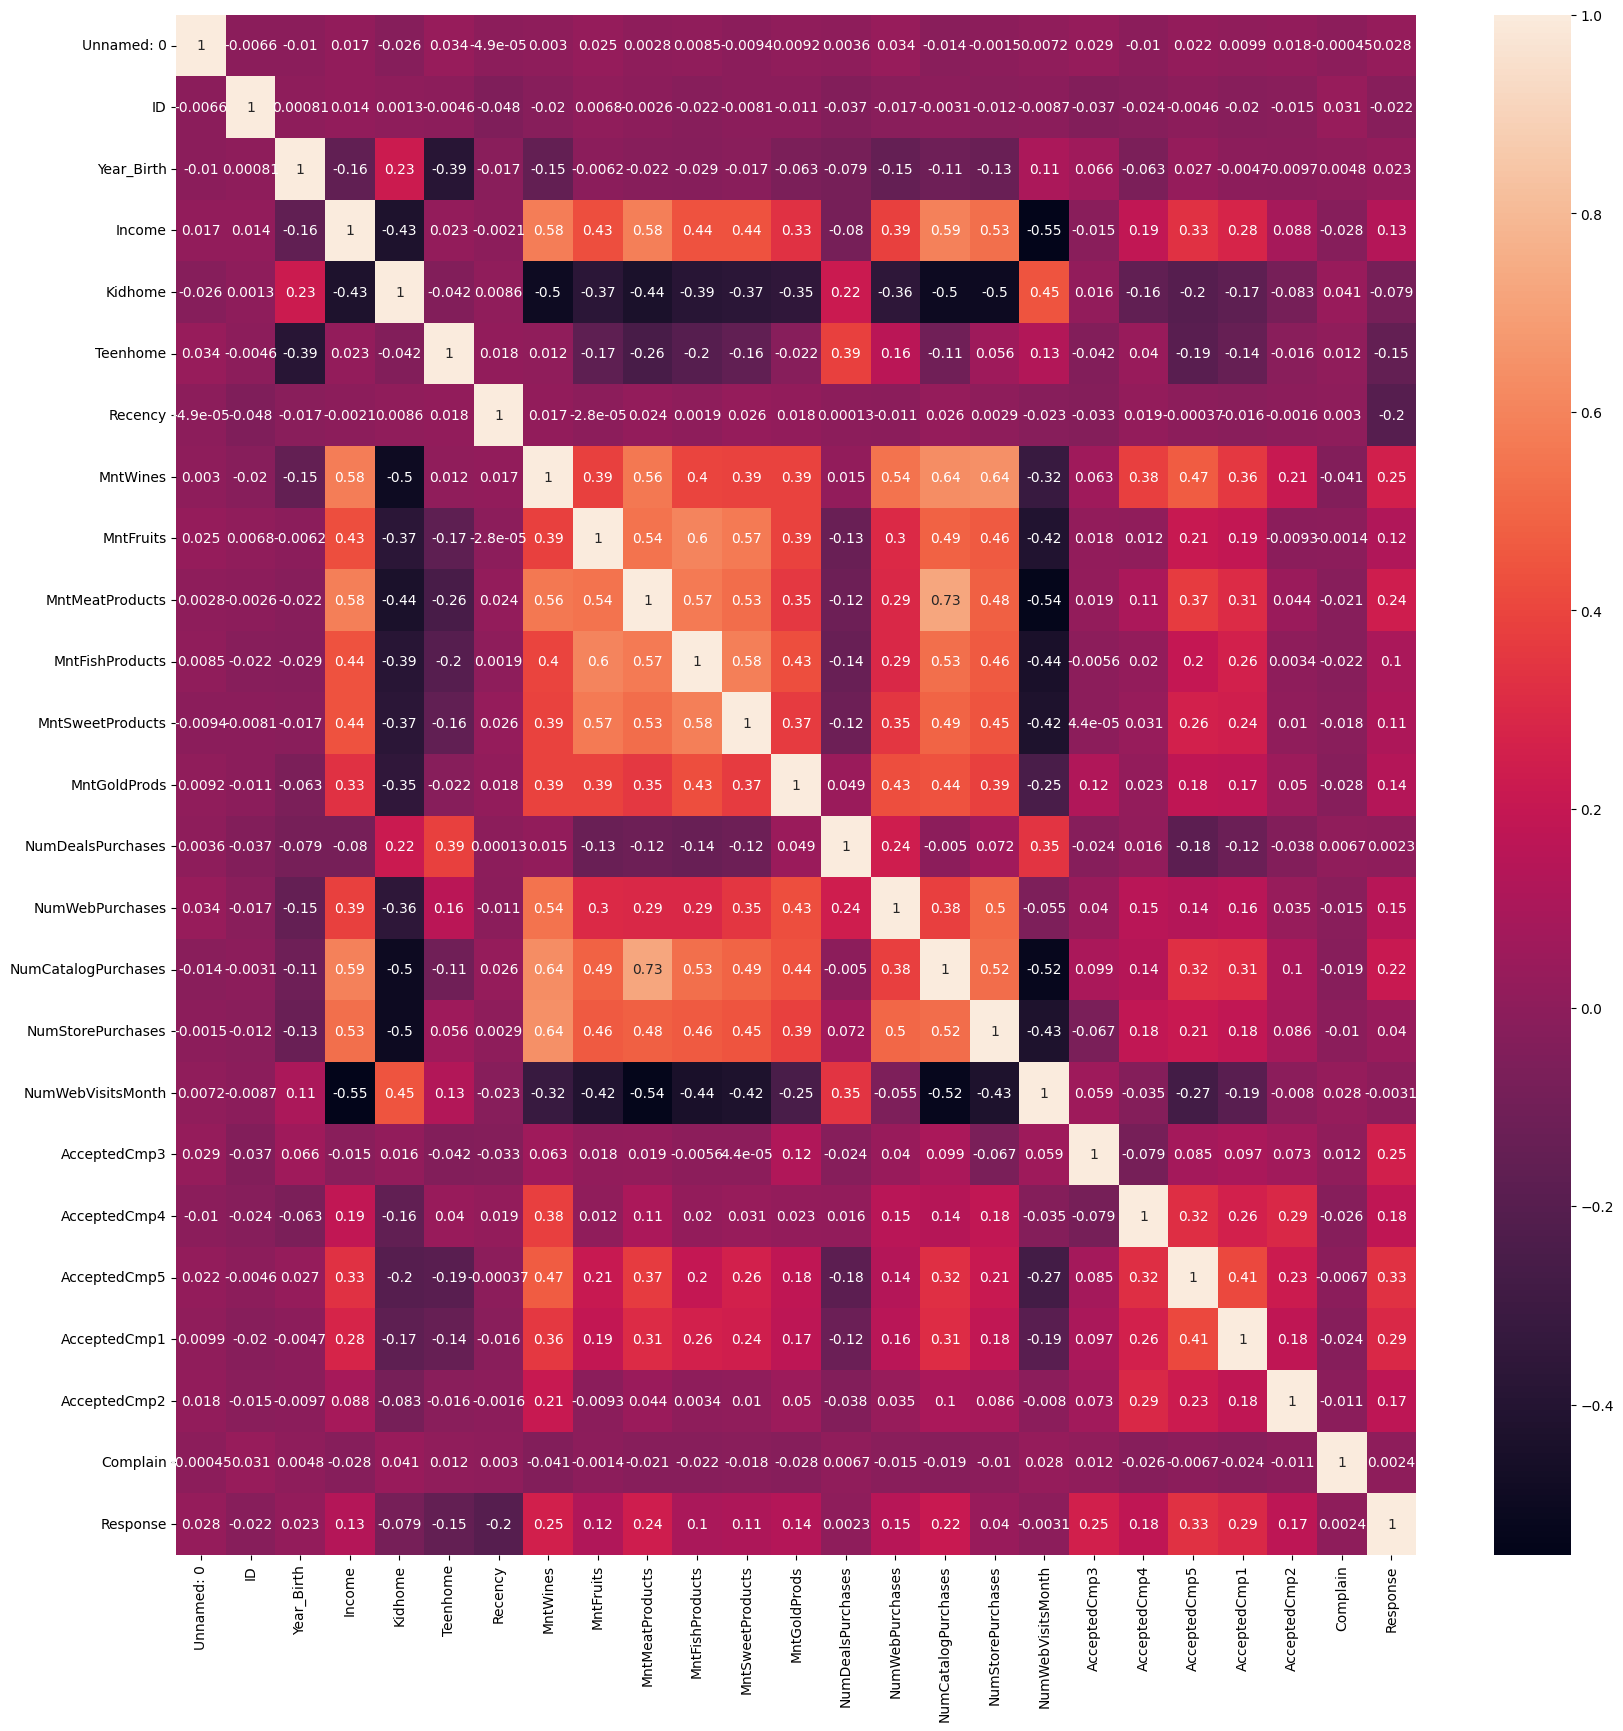

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

* From the above heatmap, we can see there is no two columns are too much correlated with each other so we can't drop any column on the basis of correlation.

# **Preprocessing**

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

Unnamed: 0             False
ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    579
Single      476
Divorced    228
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [ ]:
df['Marital_Status'].value_counts()

Relationship    1436
Single           785
Name: Marital_Status, dtype: int64

*Combining different dataframe into a single column to reduce the number of dimension*

In [ ]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

*Droping some column to reduce dimension and complexity of model*

In [ ]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [ ]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,2,4141,1965,Graduation,Relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,3,6182,1984,Graduation,Relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,4,5324,1981,PhD,Relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [ ]:
df['Age'] = 2023 - df["Year_Birth"]

In [ ]:
df['Education'].value_counts()

Graduation    1124
PhD            477
Master         365
2n Cycle       201
Basic           54
Name: Education, dtype: int64

*Changing category into UG and PG only*

In [ ]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

*Number of days a customer was engaged with company*

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2023'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,first_day,day_engaged
0,0,5524,1957,PG,Single,58138.0,2012-04-09,58,0,0,1617,1,25,66,2023-01-01,3919
1,1,2174,1954,PG,Single,46344.0,2014-08-03,38,0,2,27,0,6,69,2023-01-01,3073
2,2,4141,1965,PG,Relationship,71613.0,2013-08-21,26,0,0,776,0,21,58,2023-01-01,3420
3,3,6182,1984,PG,Relationship,26646.0,2014-10-02,26,0,1,53,0,8,39,2023-01-01,3013
4,4,5324,1981,PG,Relationship,58293.0,2014-01-19,94,0,1,422,0,19,42,2023-01-01,3269


In [ ]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain", "Unnamed: 0"],axis=1)
df.shape

(2221, 9)

# **Visualization**

In [ ]:
px.bar(df, x = 'Marital_Status', y = 'Expenses', color = 'Education')

In [ ]:
px.bar(df, x = 'Marital_Status', y = 'Expenses', color = 'Marital_Status')

* As we can see, we have less number of single customers

In [ ]:
px.histogram(df, x ='Expenses', facet_row = 'Marital_Status')

In [ ]:
px.histogram(df, x ='Expenses', facet_row = 'Education')

In [ ]:
px.histogram(df, x = 'NumTotalPurchases', facet_row = 'Education')

In [ ]:
px.histogram(df, x = 'Income', facet_row = 'Marital_Status')

In [ ]:
px.pie(df, names = 'Marital_Status', hole = 0.4, template = 'gridon')

* 35% of our customers are single whereas more 64% are in relationship.

In [ ]:
px.pie(df, names = 'Education', hole = 0.4, template = 'gridon')

 * More than 97% our customer are from PG background and approximately 2% are from UG background.

Text(0.5, 1.0, 'Total Expense based on the Education Level')

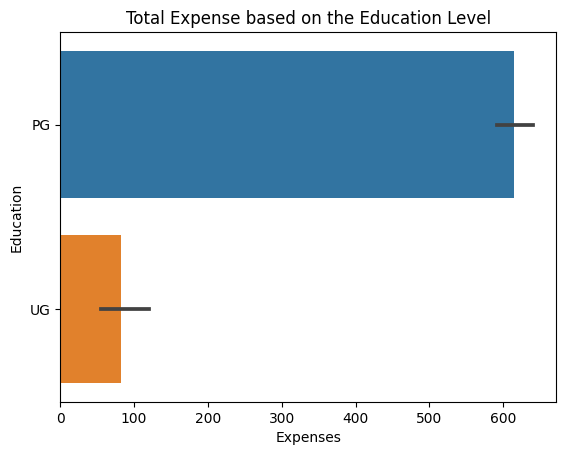

In [ ]:
sns.barplot(x = df.Expenses, y = df.Education)
plt.title('Total Expense based on the Education Level')

Text(0.5, 1.0, 'Total Income based on the Education Level')

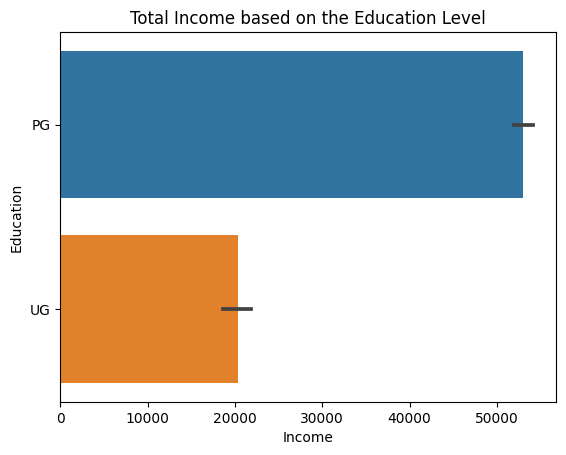

In [ ]:
sns.barplot(x = df['Income'],y = df['Education'])
plt.title('Total Income based on the Education Level')

# **Label encoding**

In [ ]:
categories = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        categories.append(i)

categories

['Education', 'Marital_Status']

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl_encode = LabelEncoder()
for i in categories:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [ ]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157858,1.352516,0.238978,-1.276540,1.689599,0.624601,1.324702,1.047989,1.971057
1,-0.157858,1.352516,-0.231371,1.389370,-0.957438,-0.498670,-1.150550,1.308093,-1.665378
2,-0.157858,-0.739363,0.776366,-1.276540,0.289500,-0.498670,0.803596,0.354378,-0.173838
3,-0.157858,-0.739363,-1.016935,0.056415,-0.914153,-0.498670,-0.889997,-1.292946,-1.923281
4,-0.157858,-0.739363,0.245159,0.056415,-0.299841,-0.498670,0.543043,-1.032842,-0.822894


**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans

k_values = range(1,11)
wcss = []
for i in k_values:
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(scaled_features_df)
  wcss.append(kmeans.inertia_)

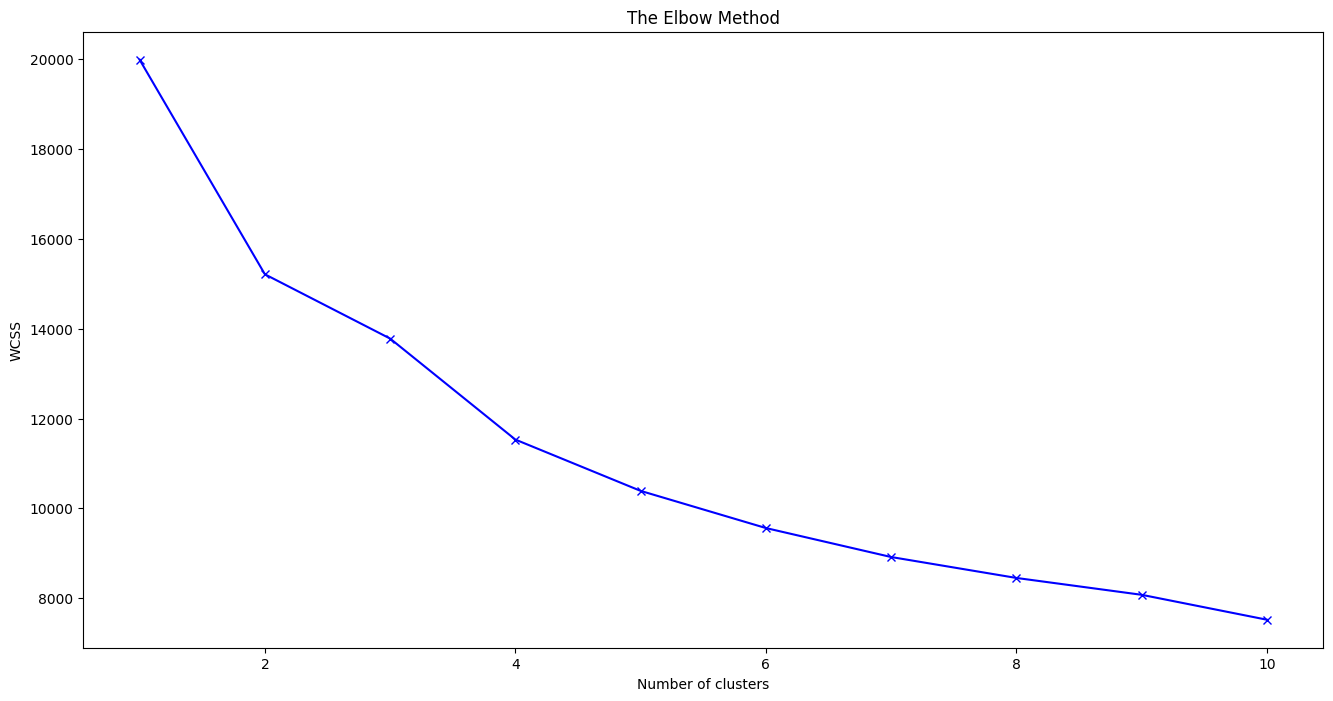

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(k_values,wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* As it is not very clear from the elbow method that which value of K to choose, we can use silhoutte score to choose the k value.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2,10):
  km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  pred = km.fit_predict(scaled_features_df)
  silhouette_scores.append(silhouette_score(scaled_features_df, pred))

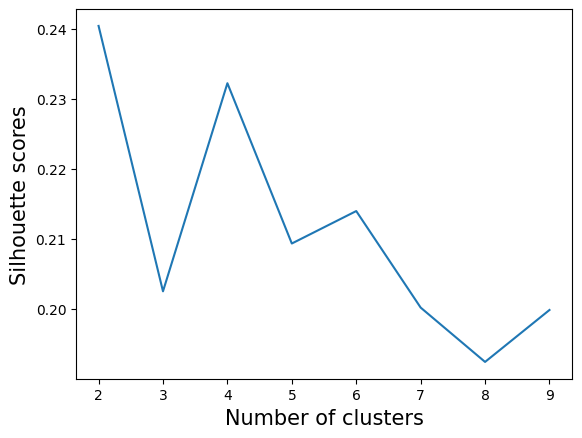

In [ ]:
plt.plot(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Silhouette scores', fontsize = 15)
plt.show()

* from the above graph we can see that for k value 2, we got a highest score, hence our k value is 2.

# **Model Building**

In [ ]:
model = KMeans(n_clusters = 2, random_state = 0)
model.fit(scaled_features_df)
pred = model.predict(scaled_features_df)

In [ ]:
df['Cluster'] = pred+1

In [ ]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,Cluster
0,0,1,58138.0,0,1617,1,25,66,3919,2
1,0,1,46344.0,2,27,0,6,69,3073,1
2,0,0,71613.0,0,776,0,21,58,3420,2
3,0,0,26646.0,1,53,0,8,39,3013,1
4,0,0,58293.0,1,422,0,19,42,3269,1


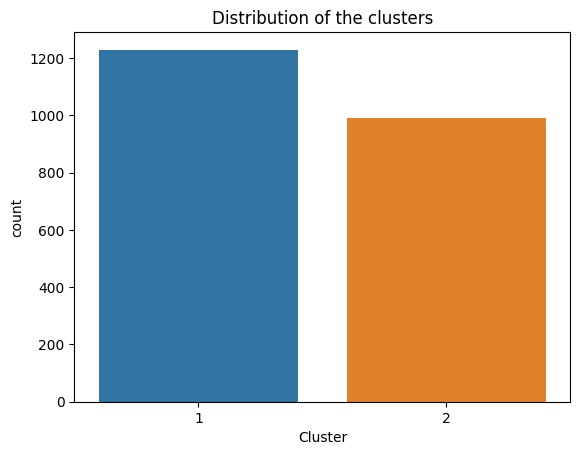

In [ ]:
sns.countplot(x = df['Cluster'])
plt.title('Distribution of the clusters')
plt.show()

**Note :-**
  
  * As we can see here that weightage of customer are more in cluster 1 as compare to other.

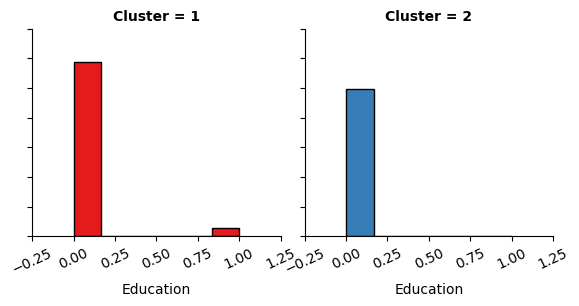

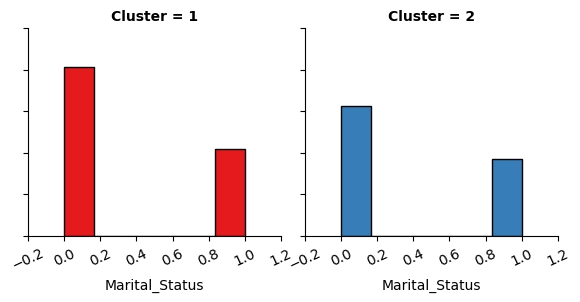

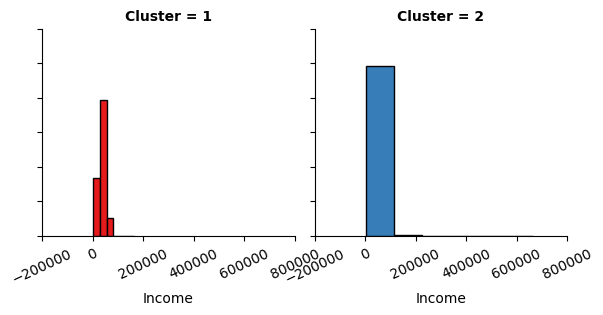

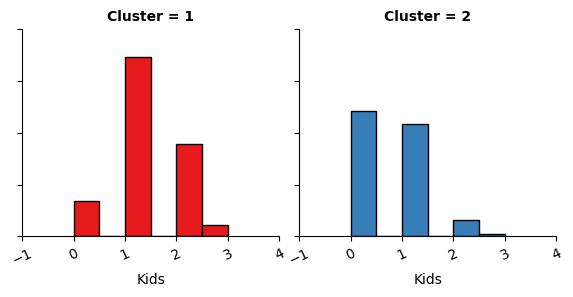

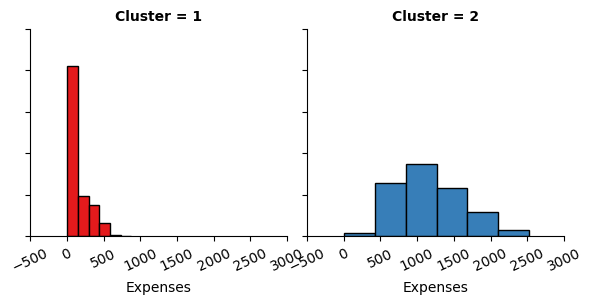

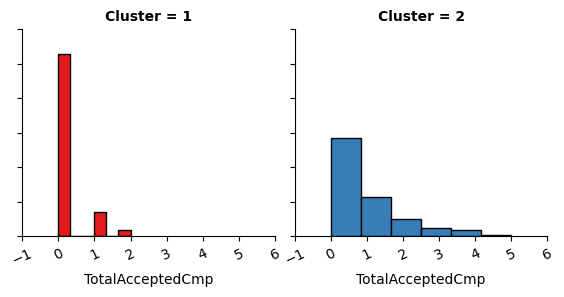

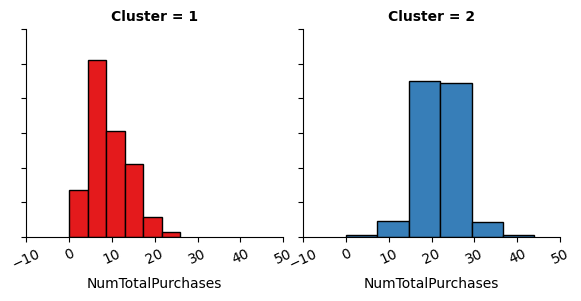

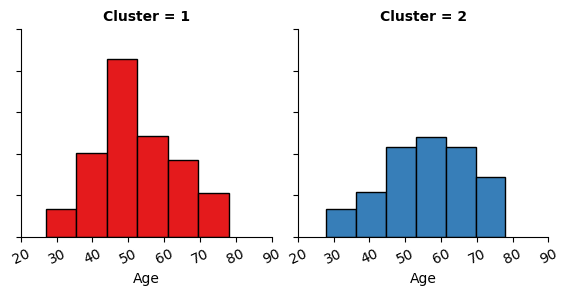

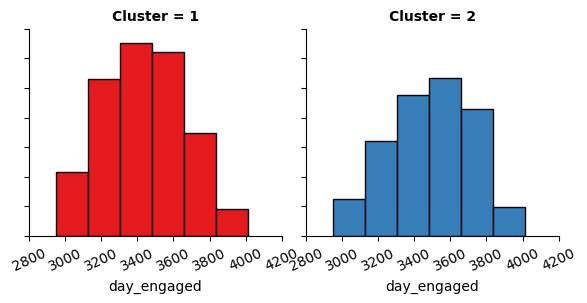

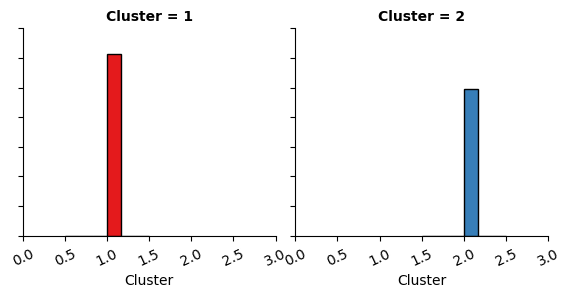

In [ ]:
for i in df:
  diag = sns.FacetGrid(df, col = "Cluster", hue = "Cluster", palette = "Set1")
  diag.map(plt.hist, i, bins=6, ec="k")
  diag.set_xticklabels(rotation=25)
  diag.set_yticklabels()
  diag.set_xlabels()
  diag.set_titles(fontweight="bold")

**Report:-**

Based on above information we can divide customer into 2 parts:-

  *  Highly Active Customer :- These customers belong to cluster one.
  * Moderately Active Customer :- These customers belong to cluster two.

**Characteristics of Highly Active Customer:**

* **In terms of Education**

    Highly Active Customer are from PG background

* **In terms of Marital_status**

    Number of people in relationship are approx. two times of single people

* **In terms of Income**

    Income of Highly active customer are little less as compare to Moderately active customer.

* **In terms of Kids**

    Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).

* **In terms of Expenses**

    Expenses of Highly Active customer are less as compare to moderate.
    These customer spent avg. of approx. 100-200 unit money.

* **In terms of Age**

    Age of these customer are between 25 to 75.
    Maximum customer age are between 40 to 70.

* **In terms of day_engaged**

    Highly Active customer are more loyal as they engaged with company for longer period of time.


**Characteristics of Moderately Active Customer:**

**In terms of Education**

* Moderately Active Customer are also from UG backgroud

**In terms of Marital_status**

* Number of people in relationship are slightly more as compare to single people

**In terms of Income**

* Income of Moderately active customer are higher as compare to other customer.

**In terms of Kids**

* Moderately active customer have less number of childern as compare to highly active customer ( Max. customer has no child ).

**In terms of Expenses**

* Expenses of Moderately Active customer are more as compare to Active.
These customer spent avg. of approx. 500-2000 unit money.

**In terms of Age**

* Age of these customer are between 25 to 75.
Maximum customer age are between 35 to 70.

**In terms of day_engaged**

* Moderately Active customer are slightly less engaged with company as compare to Highly Active Customer.